In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import os
import glob
import networkx as nx
import imageio
from collections import OrderedDict
import pandas as pd

### Task 1 + Task 2

In [15]:
class Agent(): 
    def __init__(self, x0, y0):
        self.x = x0
        self.y = y0
        self.xs = [x0]
        self.ys = [y0]
        
    def Reset(self):
        x0 = self.xs[0]
        y0 = self.ys[0]
        self.__init__(x0, y0)
        
    def RandomWalk(self, steps):
        
        assert type(steps) == int
        assert steps > 0

        for i in range(steps):
            direction = rd.randint(1, 4)
            if direction == 1: 
                self.x += 1
                self.xs.append(self.x)
                self.ys.append(self.y)
            elif direction == 2: 
                self.x -= 1
                self.xs.append(self.x)
                self.ys.append(self.y)
            elif direction == 3: 
                self.y += 1
                self.ys.append(self.y)
                self.xs.append(self.x)
            else: 
                self.y -= 1
                self.ys.append(self.y)
                self.xs.append(self.x)
    
    def PlotTrajectory(self, walktype):
        
        try:
            os.makedirs('animation')
        except FileExistsError:
            pass
        
        xs = self.xs
        ys = self.ys
        
        plt.figure(figsize=(10,6), dpi=300)
        plt.scatter(xs[0], ys[0], c='green')
        plt.xlim([min(xs)-0.1*min(xs), max(xs)+0.1*max(xs)])
        plt.ylim([min(ys)-0.1*min(ys), max(ys)+0.1*max(ys)])
        if walktype == 'rw':
            plt.title(f'Random walk, steps = {len(xs)-1}')
        elif walktype == 'prw':
            plt.title(f'Pearson random walk, steps = {len(xs)-1}')
        plt.savefig('animation/0.png')
        
        for i in range(1, len(xs)):
            plt.plot(xs[:i+1], ys[:i+1], color='black')
            plt.savefig(f'animation/{i}.png')
        
        plt.scatter(xs[-1], ys[-1], c='red')
        plt.savefig(f'animation/{len(xs)}.png')
        
        g = glob.glob('animation/*.png')
        g_sorted = [f'animation\\{j}.png' for j in range(len(g))]
        frames = [imageio.imread(frame) for frame in g_sorted]

        if walktype == 'rw':
            imageio.mimsave('animation/rw_trajectory.gif', frames)
        elif walktype == 'prw':
            imageio.mimsave('animation/prw_trajectory.gif', frames)
        
        for file in g:
            os.remove(file)
        
        plt.close()
            
    def PearsonRW(self, steps):
        
        assert type(steps) == int
        assert steps > 0

        for i in range(steps):
            direction = rd.random()*2*np.pi
            self.x += np.cos(direction)
            self.y += np.sin(direction)
            self.xs.append(self.x)
            self.ys.append(self.y)

In [44]:
a = Agent(50, 50)

In [45]:
a.RandomWalk(100)

In [46]:
a.PlotTrajectory('rw')

In [47]:
a.Reset()

In [48]:
a.PearsonRW(100)

In [49]:
a.PlotTrajectory('prw')

In [16]:
a1 = Agent(0, 0)
AT = np.zeros(1000)
for i in range(1000):
    a1.PearsonRW(1000)
    right_half = [x for x in a1.xs if x > 0]
    AT[i] = len(right_half) / len(a1.xs)
    a1.Reset()

In [17]:
np.mean(AT)

0.48016383616383623

In [3]:
plt.figure(figsize=(16,8), dpi=200)
plt.hist(AT, density=True, color='purple', bins=50)
plt.xlabel(r'$A_T$')
plt.ylabel('density')
plt.title(r'$A_T$ density histogram')
plt.savefig('plots/AT.png')
plt.close()

NameError: name 'AT' is not defined

<Figure size 3200x1600 with 0 Axes>

In [19]:
a2 = Agent(0, 0)
BT = np.zeros(1000)
for i in range(1000):
    a2.PearsonRW(1000)
    pairs = [(a2.xs[j], a2.ys[j]) for j in range(1, 1001)]
    first_quad = [p for p in pairs if p[0] > 0 and p[1] > 0]
    BT[i] = len(first_quad) / len(pairs)
    a2.Reset()

In [20]:
np.mean(BT)

0.264284

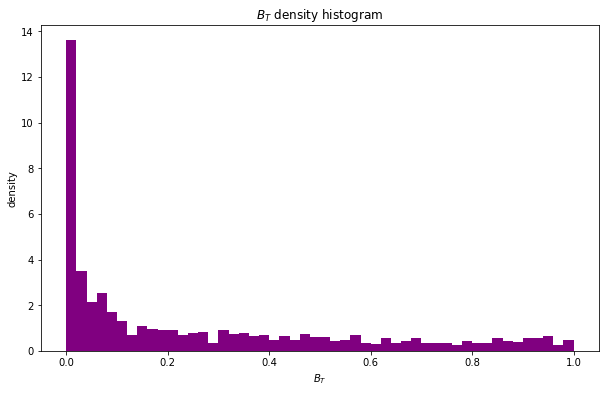

In [21]:
plt.figure(figsize=(10,6))
plt.hist(BT, density=True, color='purple', bins=50)
plt.xlabel(r'$B_T$')
plt.ylabel('density')
plt.title(r'$B_T$ density histogram')
plt.show()

### Task 3

In [2]:
def SnapShot(graph, node, ind, pos):
    
        nodes = list(graph.nodes)
        color_map = ['green']*(len(nodes))
        nodeind = nodes.index(node)
        color_map[nodeind] = 'blue'
        plt.figure(figsize=(10,6), dpi=300)
        nx.draw(graph, node_color=color_map, with_labels=True, pos=pos)            
        plt.savefig(f'animation/{ind}.png')
        plt.clf()
        plt.close()

In [8]:
def GraphRW(graph, origin, animate=False, filename=None): 
    
    nodes = list(graph.nodes)
    cur = origin
    visited = set()
    visited.add(cur)
    nodes_hit = [(cur, 0)]
    i = 0
    
    if animate == True:
        try:
            os.makedirs('animation')
        except FileExistsError:
            pass
        
        pos = nx.spring_layout(graph)
        SnapShot(graph, cur, i, pos)
        
    while len(visited) < len(nodes):
        
        nbrs = [j for j in graph.neighbors(cur)]
        cur = rd.choice(nbrs)
        i += 1
        if not cur in visited:
            visited.add(cur)
            nodes_hit.append((cur, i))
        
        if animate == True:
            SnapShot(graph, cur, i, pos)
        
    if animate == True:
        g = glob.glob('animation/*.png')
        g_sorted = [f'animation\\{j}.png' for j in range(len(g))]
        frames = [imageio.imread(frame) for frame in g_sorted]
        imageio.mimsave(f'animation/{filename}_rw.gif', frames)
        
        for file in g:
            os.remove(file)
    
    hit_times = sorted(nodes_hit)
        
    return hit_times

In [12]:
def avg_hit_times(graph, origin, steps):
    
    nodes = list(graph.nodes)
    avgs = [0]*len(nodes)
    ht = pd.DataFrame(list(zip(nodes, avgs)), columns = ['node', 'avg_hit_time'])

    for i in range(steps):
        htimes = GraphRW(graph, origin)
        times_add = [j[1] for j in htimes]
        ht['avg_hit_time'] += times_add

    ht['avg_hit_time'] /= steps

    return ht

#### Animations

In [10]:
g = nx.erdos_renyi_graph(20, 0.5)

In [60]:
GraphRW(g, 5, animate=True, filename='erdos_renyi')

147

In [58]:
g1 = nx.watts_strogatz_graph(20, 2, 0.3)

In [6]:
GraphRW(g1, 10, animate=True, filename='watts_strogatz')

175

In [59]:
g2 = nx.barabasi_albert_graph(20, 3)

In [8]:
GraphRW(g2, 15, animate=True, filename='barabasi_albert')

91

#### Analysis

In [14]:
g3 = nx.erdos_renyi_graph(100, 0.5)

In [15]:
g4 = nx.watts_strogatz_graph(100, 2, 0.3)

In [16]:
g5 = nx.barabasi_albert_graph(100, 3)

In [17]:
er = avg_hit_times(g3, 0, 1000)

In [18]:
ws = avg_hit_times(g4, 0, 1000)

In [19]:
ba = avg_hit_times(g5, 0, 1000)

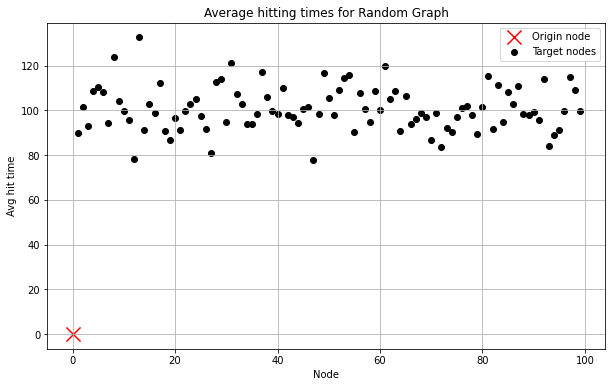

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(er['node'][0], er['avg_hit_time'][0], c='red', marker='x', s=200, label='Origin node')
plt.scatter(er['node'][1:], er['avg_hit_time'][1:], c='black', label='Target nodes')
plt.xlabel('Node')
plt.ylabel('Avg hit time')
plt.title('Average hitting times for Random Graph')
plt.grid()
plt.legend()
plt.show()

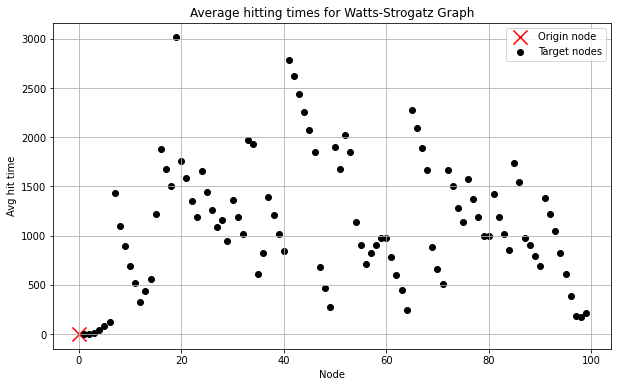

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(ws['node'][0], ws['avg_hit_time'][0], c='red', marker='x', s=200, label='Origin node')
plt.scatter(ws['node'][1:], ws['avg_hit_time'][1:], c='black', label='Target nodes')
plt.xlabel('Node')
plt.ylabel('Avg hit time')
plt.title('Average hitting times for Watts-Strogatz Graph')
plt.grid()
plt.legend()
plt.show()

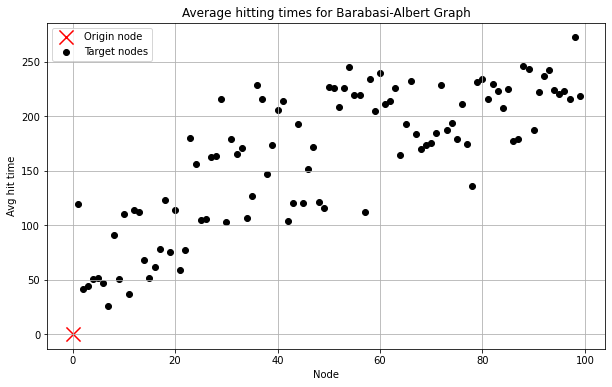

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(ba['node'][0], ba['avg_hit_time'][0], c='red', marker='x', s=200, label='Origin node')
plt.scatter(ba['node'][1:], ba['avg_hit_time'][1:], c='black', label='Target nodes')
plt.xlabel('Node')
plt.ylabel('Avg hit time')
plt.title('Average hitting times for Barabasi-Albert Graph')
plt.grid()
plt.legend()
plt.show()

In [33]:
er1 = avg_hit_times(g3, 50, 1000)

In [34]:
ws1 = avg_hit_times(g4, 50, 1000)

In [35]:
ba1 = avg_hit_times(g5, 50, 1000)

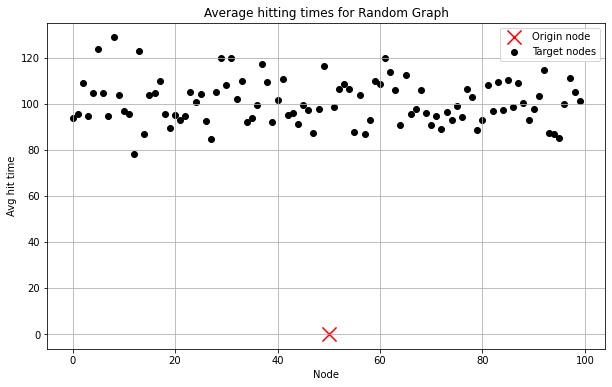

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(er1['node'][50], er1['avg_hit_time'][50], c='red', marker='x', s=200, label='Origin node')
plt.scatter(er1['node'][:50], er1['avg_hit_time'][:50], c='black', label='Target nodes')
plt.scatter(er1['node'][51:], er1['avg_hit_time'][51:], c='black')
plt.xlabel('Node')
plt.ylabel('Avg hit time')
plt.title('Average hitting times for Random Graph')
plt.grid()
plt.legend()

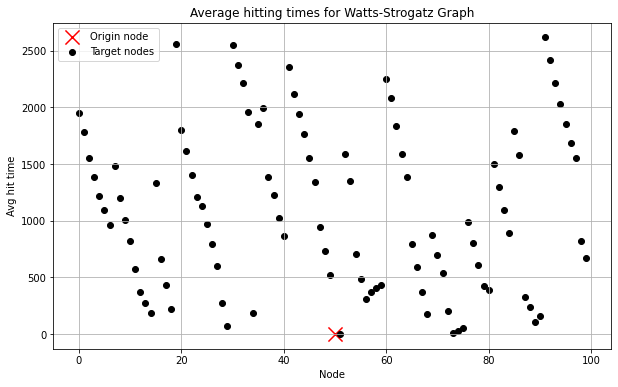

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(ws1['node'][50], ws1['avg_hit_time'][50], c='red', marker='x', s=200, label='Origin node')
plt.scatter(ws1['node'][:50], ws1['avg_hit_time'][:50], c='black', label='Target nodes')
plt.scatter(ws1['node'][51:], ws1['avg_hit_time'][51:], c='black')
plt.xlabel('Node')
plt.ylabel('Avg hit time')
plt.title('Average hitting times for Watts-Strogatz Graph')
plt.grid()
plt.legend()

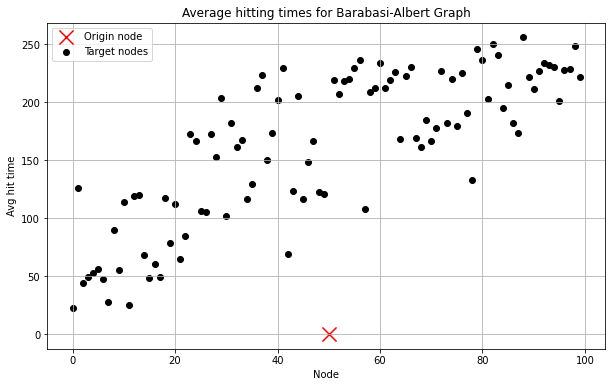

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(ba1['node'][50], ba1['avg_hit_time'][50], c='red', marker='x', s=200, label='Origin node')
plt.scatter(ba1['node'][:50], ba1['avg_hit_time'][:50], c='black', label='Target nodes')
plt.scatter(ba1['node'][51:], ba1['avg_hit_time'][51:], c='black')
plt.xlabel('Node')
plt.ylabel('Avg hit time')
plt.title('Average hitting times for Barabasi-Albert Graph')
plt.grid()
plt.legend()
plt.show()